In [41]:
# PCA Example
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
# Select only the numneric columns
numerical_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']

In [44]:
# Handle missing values
imputer = SimpleImputer(strategy = 'mean')
data_imputed = imputer.fit_transform(df[numerical_cols])

In [ ]:
# Convert back to a DataFrame
data_clean = pd.DataFrame(data_imputed,columns = numerical_cols)

In [46]:
# 4. Standardize(important for PCA)
# PCA is affected by feature scale - we scale all features to have mean = 0 and std = 1
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean)


In [47]:
# 5. Apply PCA
# Lets' keep up to 7 components (can be fewer than number of columns of columns)
pca = PCA(n_components = 7)
data_pca = pca.fit_transform(data_scaled)

In [48]:
# 6. Check how much information each component keeps 
explained_variance = pca.explained_variance_ratio_ # % of total info (variance) captured by each component
cumulative_variance = np.cumsum(explained_variance) # cumulative total

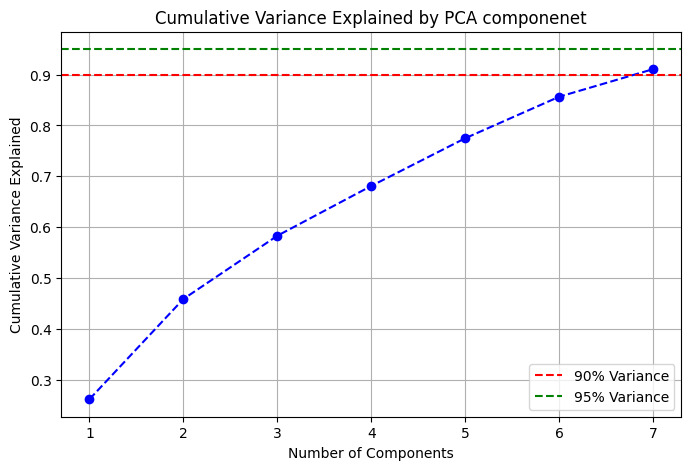

In [49]:
# Plot cumulative variance
plt.figure(figsize=(8,5))
plt.plot(range(1,len(cumulative_variance) + 1), cumulative_variance, marker ='o', linestyle = '--', color = 'b')
plt.title('Cumulative Variance Explained by PCA componenet')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.axhline(y = 0.9, color = 'r',linestyle = '--', label = '90% Variance')
plt.axhline(y = 0.95, color = 'g', linestyle ='--', label = '95% Variance')
plt.legend()
plt.grid(True)
plt.show()

In [50]:
# 8. print variance info
print("Explained Variance Ratio (each PC shows how much info it captures);")
print(explained_variance.round(3))

Explained Variance Ratio (each PC shows how much info it captures);
[0.261 0.197 0.124 0.098 0.094 0.082 0.054]


In [51]:
print("\n Cumulativer Variance (how much total info is captured):")
print(cumulative_variance.round(3))
     


 Cumulativer Variance (how much total info is captured):
[0.261 0.459 0.583 0.681 0.775 0.856 0.911]


In [52]:
# 9. Find feature contribution (loadings)
# Loading tell us how each original feature contributes to each principla component 
loading = pd.DataFrame(
    pca.components_.T, # transpose to get features as rows
    columns = [f'PC{i + 1}' for i in range(pca.n_components_)],
    index = numerical_cols
)
print("\n Feature Loadings (importance of each feature in each component):")
print(loading.round(3))


 Feature Loadings (importance of each feature in each component):
                            PC1    PC2    PC3    PC4    PC5    PC6    PC7
Pregnancies               0.216  0.527  0.165  0.161  0.212 -0.457  0.079
Glucose                   0.437  0.096 -0.391 -0.327  0.109  0.383 -0.208
BloodPressure             0.300  0.046  0.630  0.011 -0.059  0.608  0.327
SkinThickness             0.307 -0.448  0.294  0.074  0.172 -0.398  0.282
Insulin                   0.336 -0.355 -0.142 -0.098  0.650 -0.009 -0.082
BMI                       0.397 -0.210  0.252 -0.163 -0.527 -0.241 -0.573
DiabetesPedigreeFunction  0.238 -0.175 -0.285  0.874 -0.157  0.172 -0.057
Age                       0.279  0.533  0.126  0.171  0.204  0.001 -0.299
Outcome                   0.416  0.155 -0.395 -0.182 -0.378 -0.171  0.580


In [53]:
# Addon : Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [54]:
#.10. Select Optimal Number of components (e.g., for 95 % variance)
#Find the index of the first compoent where cumlative variance is >= 0.95
index_of_95 = np.argmax(cumulative_variance >= 0.95)

In [62]:
#np.argmax returns the index of the first 'True'. If no True is found, it returns 0.
#We must check if the 95% target was actually reached at that index.
if cumulative_variance[index_of_95] >= 0.95:i

In [63]:
print(f"\nOptimal number of components to retain 95% variance:{n_opt}")


Optimal number of components to retain 95% variance:1


In [ ]:
#Use the optimally reduced data for modeling
X_pca_reduced = data_pca[:,:n_opt]

In [58]:
#11.Prepare Data and Model
y=df['Outcome']

In [59]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca_reduced,y,test_size=0.3, random_state = 42, stratify=y)

In [60]:
#Intitalize and train the Logistic Regression model
log_reg = LogisticRegression(solver='liblinear',random_state=42, max_iter=1000)
log_reg.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [61]:
# Predict and Evaluate
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f"Model Accuracy:{accuracy:.4f}")

Model Accuracy:0.8052
